In [7]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [13]:
df = pd.read_excel('sales_data_sample.xlsx', sheet_name="saledata")
df.head(5)
# df = pd.read_excel('./sales_data_sample.xlsx',header=0,delimiter=',',encoding='utf-8')
# df.head(5)

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


In [18]:
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum()
fifth_country_sales = total_sales_by_country.sort_values(ascending=False).iloc[4]
print(f"Quốc gia có tổng doanh số đặt hàng nhiều thứ 5 là: {fifth_country_sales}")

Quốc gia có tổng doanh số đặt hàng nhiều thứ 5 là: 478880.46


In [20]:
fifth_country = total_sales_by_country.sort_values(ascending=False).index[4]
print(f"Quốc gia có tổng doanh số đặt hàng nhiều thứ 5 là: {fifth_country}")

Quốc gia có tổng doanh số đặt hàng nhiều thứ 5 là: UK


In [21]:
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum()

# Sắp xếp tổng doanh số theo thứ tự giảm dần
sorted_sales = total_sales_by_country.sort_values(ascending=False)

# Lấy tên quốc gia thứ 5
fifth_country = sorted_sales.index[4]

# In kết quả
print(f"Quốc gia có tổng doanh số đặt hàng nhiều thứ 5 là: {fifth_country}")

Quốc gia có tổng doanh số đặt hàng nhiều thứ 5 là: UK


In [22]:
# Tính độ lệch chuẩn của giá trị đặt hàng
std_deviation = df['SALES'].std()

# In kết quả
print(f"Độ lệch chuẩn của giá trị đặt hàng là: {std_deviation}")

Độ lệch chuẩn của giá trị đặt hàng là: 1841.865105740182


In [23]:
# Tính độ lệch chuẩn của giá trị đặt hàng
std_deviation = df['SALES'].std(ddof=0)  # ddof=0 để tính độ lệch chuẩn mẫu

# In kết quả
print(f"Độ lệch chuẩn của giá trị đặt hàng là: {std_deviation}")

Độ lệch chuẩn của giá trị đặt hàng là: 1841.5388520655404


In [24]:
min_sales = df['SALES'].min()
max_sales = df['SALES'].max()

# Áp dụng Min-Max Scaler cho cột SALES
df['SALES_scaled'] = (df['SALES'] - min_sales) / (max_sales - min_sales)

# Lấy giá trị đã scale cho các index từ 50 đến 59
scaled_values = df['SALES_scaled'].iloc[50:60]

# In kết quả
print(scaled_values)

50    0.571492
51    0.142230
52    0.268965
53    0.846934
54    0.251044
55    0.169972
56    0.207757
57    0.346367
58    0.333417
59    0.233724
Name: SALES_scaled, dtype: float64


In [28]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Trung bình kích thước đặt hàng theo trạng thái giao hàng:
 STATUS
Cancelled     33.966667
Disputed      42.642857
In Process    36.341463
On Hold       42.704545
Resolved      35.319149
Shipped       34.926634
Name: QUANTITYORDERED, dtype: float64

Kết quả kiểm định ANOVA: F-statistic = 7.594976898797586, p-value = 4.252819127064215e-07


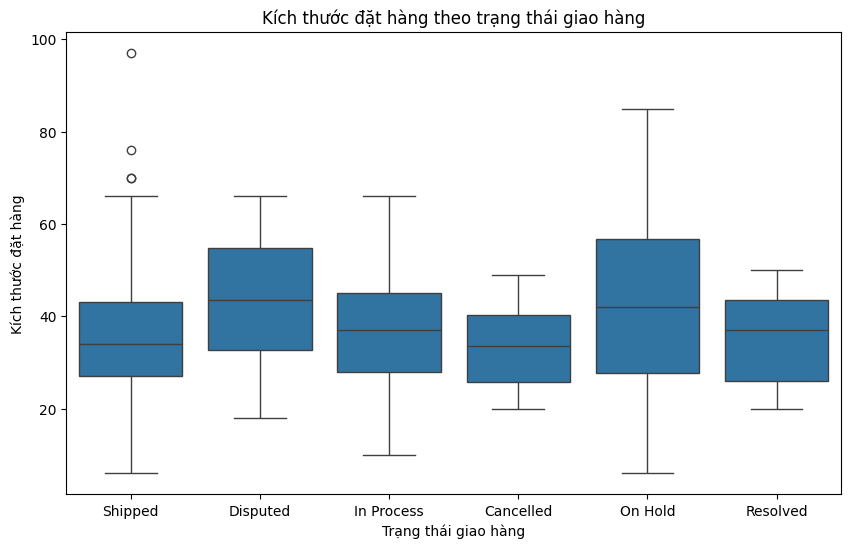

In [29]:
mean_quantity_by_status = df.groupby('STATUS')['QUANTITYORDERED'].mean()
print("Trung bình kích thước đặt hàng theo trạng thái giao hàng:\n", mean_quantity_by_status)

# Kiểm định ANOVA
anova_result = stats.f_oneway(
    *(df[df['STATUS'] == status]['QUANTITYORDERED'] for status in df['STATUS'].unique())
)

print(f"\nKết quả kiểm định ANOVA: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Vẽ biểu đồ hộp
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', y='QUANTITYORDERED', data=df)
plt.title('Kích thước đặt hàng theo trạng thái giao hàng')
plt.ylabel('Kích thước đặt hàng')
plt.xlabel('Trạng thái giao hàng')
plt.show()

In [30]:
# Lấy danh sách các quốc gia duy nhất
unique_countries = df['COUNTRY'].unique()

# Tính số lượng quốc gia
number_of_countries = len(unique_countries)

# In kết quả
print(f"Số lượng quốc gia đã đặt hàng tại công ty ABC là: {number_of_countries}")

Số lượng quốc gia đã đặt hàng tại công ty ABC là: 19


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Đọc dữ liệu từ file Excel
df = pd.read_excel('sales_data_sample.xlsx')

# Tạo đối tượng Z-Score Scaler
z_score_scaler = StandardScaler()

# Áp dụng Z-Score Scaler cho cột SALES
df['SALES_z_scaled'] = z_score_scaler.fit_transform(df[['SALES']])

# Tạo đối tượng Max Absolute Scaler
max_abs_scaler = MaxAbsScaler()

# Áp dụng Max Absolute Scaler cho cột SALES đã được Z-Score Scaled
df['SALES_final_scaled'] = max_abs_scaler.fit_transform(df[['SALES_z_scaled']])

# Lấy giá trị đã scale cho index = 100
scaled_value_index_100 = df['SALES_final_scaled'].iloc[100]

# In kết quả
print(f"Giá trị tại index = 100 sau khi được scale là: {scaled_value_index_100}")

Giá trị tại index = 100 sau khi được scale là: -0.053543911213573936


In [32]:
# Tính độ lệch chuẩn của SALES cho từng nhóm kích thước đặt hàng
std_dev_by_dealsize = df.groupby('DEALSIZE')['SALES'].std()

# Sắp xếp độ lệch chuẩn theo thứ tự tăng dần
sorted_std_dev = std_dev_by_dealsize.sort_values()

# In kết quả
print("Thứ tự mức độ ổn định tăng dần của giá trị bán hàng theo kích thước đặt hàng:")
print(sorted_std_dev)

Thứ tự mức độ ổn định tăng dần của giá trị bán hàng theo kích thước đặt hàng:
DEALSIZE
Small      577.183322
Medium    1047.090148
Large     1294.739895
Name: SALES, dtype: float64


In [33]:
# Tính giá trị trung bình và độ lệch chuẩn của cột SALES
mean_sales = df['SALES'].mean()
std_sales = df['SALES'].std()

# Giá trị Z-Score
z_score = 0.25

# Tính giá trị trước chuẩn hóa
original_value = z_score * std_sales + mean_sales

# In kết quả
print(f"Giá trị trước chuẩn hóa là: {original_value}")

Giá trị trước chuẩn hóa là: 4014.3553483443616


In [34]:
data_shape = df.shape

# In kết quả
print(f"Số lượng hàng: {data_shape[0]}")
print(f"Số lượng cột: {data_shape[1]}")

Số lượng hàng: 2823
Số lượng cột: 12


In [35]:
# Tính giá trị trung bình và độ lệch chuẩn của cột SALES
mean_sales = df['SALES'].mean()
std_sales = df['SALES'].std()

# Giá trị cần tính Z-Score
value_to_scale = 10000

# Tính Z-Score
z_score = (value_to_scale - mean_sales) / std_sales

# In kết quả
print(f"Giá trị 10000 sau khi được scale bằng Z-Score là: {z_score}")

Giá trị 10000 sau khi được scale bằng Z-Score là: 3.499773630545118


In [37]:
import pandas as pd
from scipy.stats import kurtosis
# Tính kurtosis của cột QUANTITYORDERED
kurtosis_value = kurtosis(df['QUANTITYORDERED'])

# Xác định mức độ nhọn
if kurtosis_value < 3:
    kurtosis_type = 'Platykurtic'
elif kurtosis_value > 3:
    kurtosis_type = 'Leptokurtic'
else:
    kurtosis_type = 'Mesokurtic'

# In kết quả
print(f"Kurtosis của giá trị đặt hàng là: {kurtosis_value}")
print(f"Mức độ nhọn của giá trị đặt hàng là: {kurtosis_type}")

Kurtosis của giá trị đặt hàng là: 0.4128831579388397
Mức độ nhọn của giá trị đặt hàng là: Platykurtic


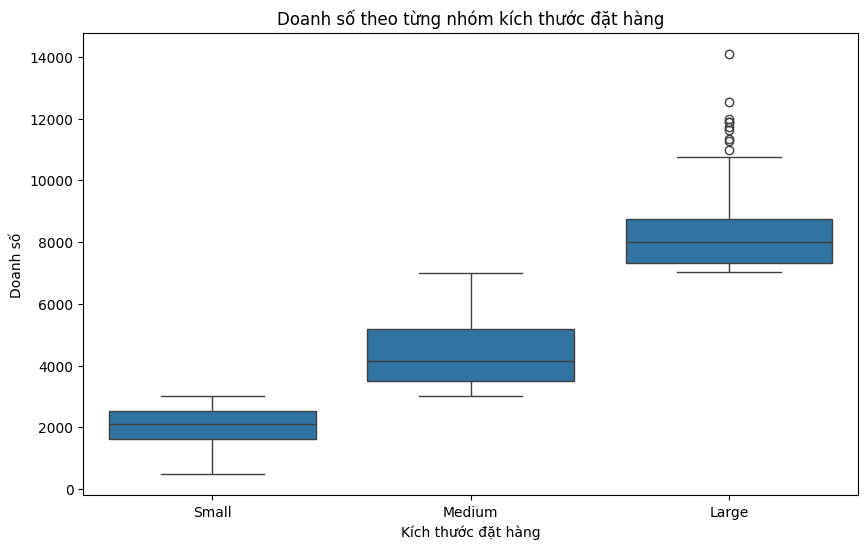

In [38]:
# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Doanh số theo từng nhóm kích thước đặt hàng')
plt.ylabel('Doanh số')
plt.xlabel('Kích thước đặt hàng')
plt.show()

In [39]:
# Tính tổng doanh số theo quốc gia
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum()

# Sắp xếp tổng doanh số theo thứ tự giảm dần và lấy quốc gia thứ 5
fifth_country_sales = total_sales_by_country.sort_values(ascending=False).iloc[4]

# In kết quả
print(f"Tổng doanh số đặt hàng ở quốc gia thứ 5 là: {fifth_country_sales}")

Tổng doanh số đặt hàng ở quốc gia thứ 5 là: 478880.46


In [40]:
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum()

# Sắp xếp tổng doanh số theo thứ tự giảm dần
sorted_sales = total_sales_by_country.sort_values(ascending=False)

# Lấy tên quốc gia thứ 5
fifth_country = sorted_sales.index[4]

# In kết quả
print(f"Quốc gia có tổng doanh số đặt hàng nhiều thứ 5 là: {fifth_country}")

Quốc gia có tổng doanh số đặt hàng nhiều thứ 5 là: UK


In [41]:
# Sắp xếp tổng doanh số theo thứ tự giảm dần
sorted_sales = total_sales_by_country.sort_values(ascending=False)

# Lấy tên quốc gia thứ 4
fourth_country = sorted_sales.index[3]

# In kết quả
print(f"Quốc gia có tổng doanh số đặt hàng nhiều thứ 4 là: {fourth_country}")

Quốc gia có tổng doanh số đặt hàng nhiều thứ 4 là: Australia


In [42]:
# Tính tổng doanh số theo quốc gia
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum()

# Sắp xếp tổng doanh số theo thứ tự giảm dần và lấy 10 quốc gia đầu
top_10_countries = total_sales_by_country.sort_values(ascending=False).head(10)

# In kết quả
print("10 quốc gia có tổng doanh số đặt hàng nhiều nhất:")
print(top_10_countries)

10 quốc gia có tổng doanh số đặt hàng nhiều nhất:
COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64


In [43]:
# Tính độ lệch chuẩn của giá trị đặt hàng
std_deviation = df['QUANTITYORDERED'].std()

# In kết quả
print(f"Độ lệch chuẩn của giá trị đặt hàng là: {std_deviation}")

Độ lệch chuẩn của giá trị đặt hàng là: 9.741442737069592


In [44]:
# Tính độ lệch chuẩn của giá trị đặt hàng
# ddof=0 tính độ lệch chuẩn cho toàn bộ dữ liệu (phương sai mẫu)
std_deviation = df['QUANTITYORDERED'].std(ddof=0)

# In kết quả
print(f"Độ lệch chuẩn của giá trị đặt hàng là: {std_deviation}")

Độ lệch chuẩn của giá trị đặt hàng là: 9.739717213588326


Các nhóm STATUS chỉ có 2 cột:
Series([], Name: count, dtype: int64)


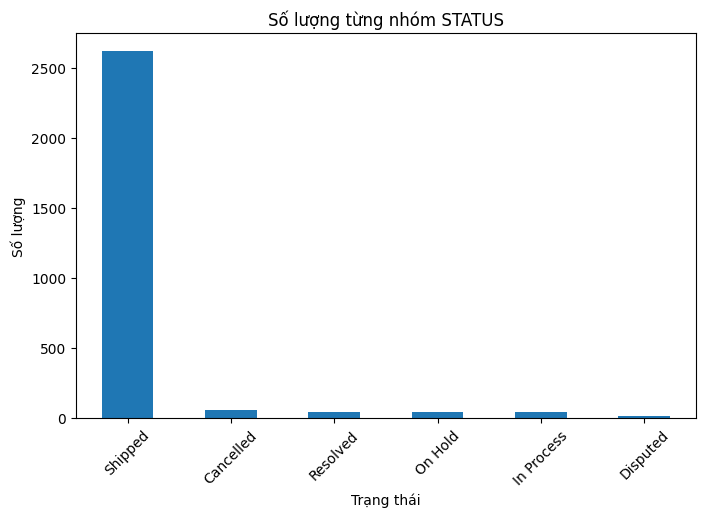

In [45]:
status_counts = df['STATUS'].value_counts()

# Lấy các nhóm chỉ có 2 cột
two_columns_status = status_counts[status_counts == 2]

# In kết quả
print("Các nhóm STATUS chỉ có 2 cột:")
print(two_columns_status)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
status_counts.plot(kind='bar')
plt.title('Số lượng từng nhóm STATUS')
plt.xlabel('Trạng thái')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()